In [2]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#importing train test split module
from sklearn.model_selection import train_test_split

#importing the algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [3]:
#data collection and processing

In [4]:
diabetics=pd.read_csv('diabetes (1).csv')

In [5]:
diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetics.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diabetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
x=diabetics.iloc[:,:-1]

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
#univariate analysis

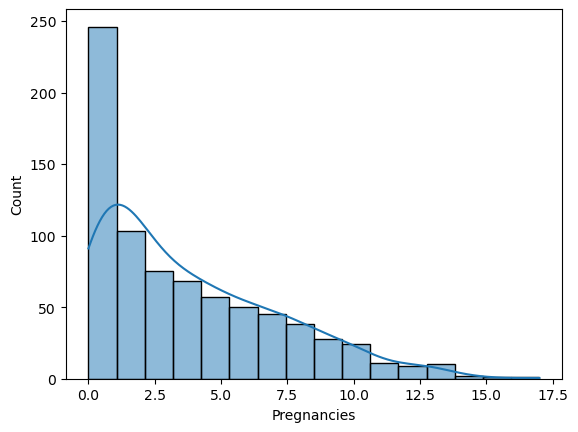

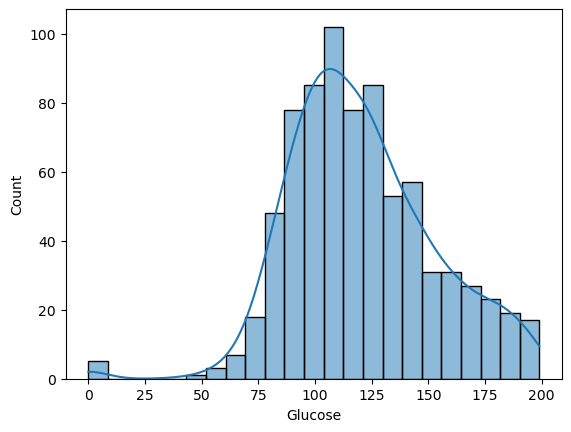

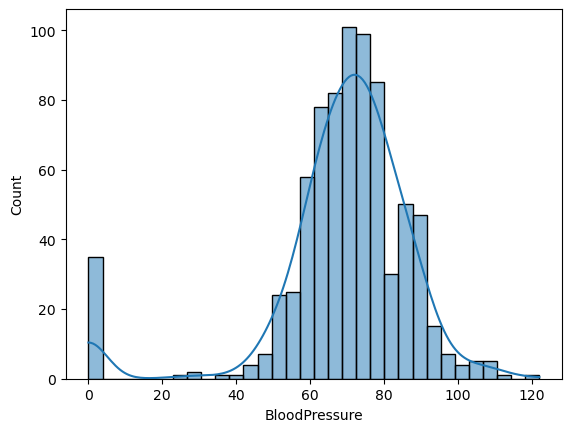

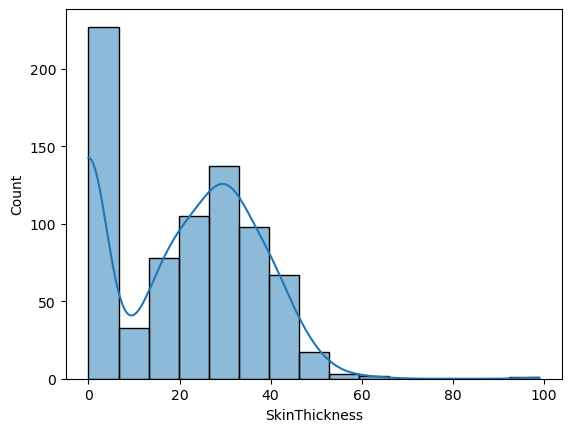

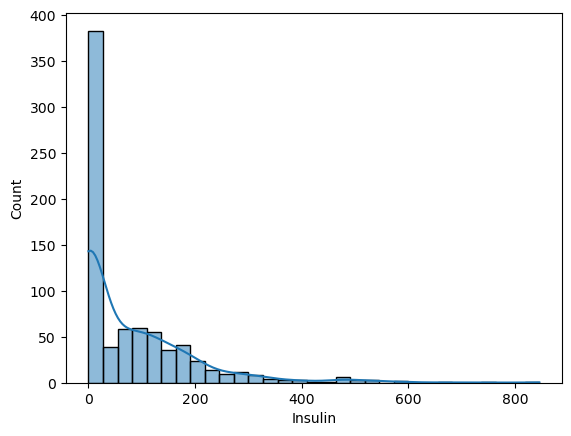

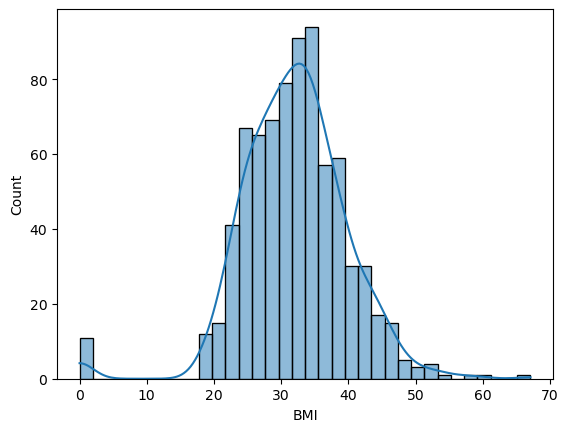

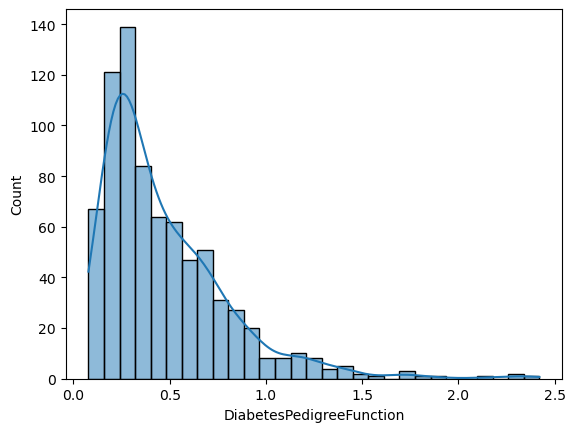

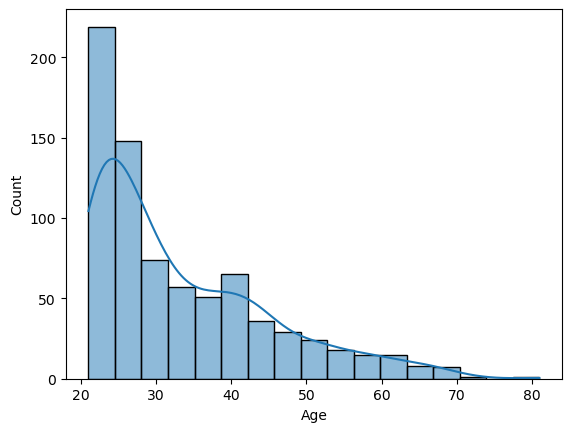

In [11]:
for i in x:
    sns.histplot(data=x, x=i, kde=True)
    plt.show()

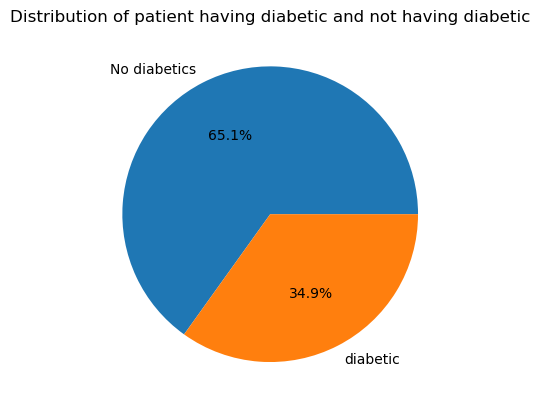

In [13]:
sizes = diabetics['Outcome'].value_counts()

# Create pie chart
plt.pie(sizes, labels=['No diabetics', 'diabetic'], autopct='%1.1f%%')
plt.title('Distribution of patient having diabetic and not having diabetic')
plt.show()

In [16]:
for i in diabetics:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


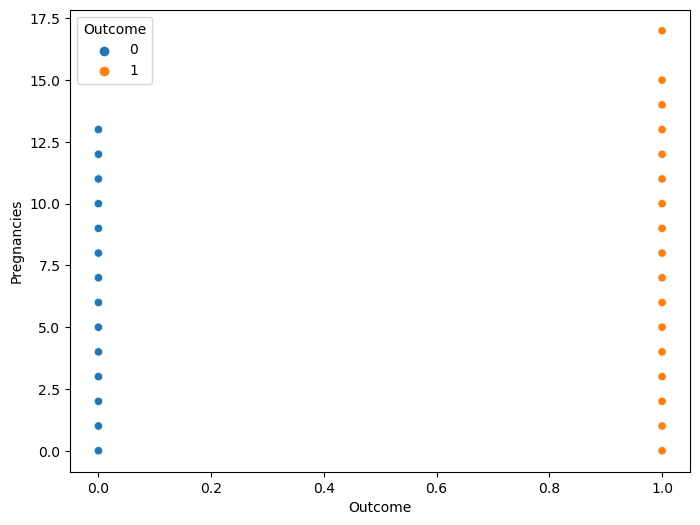

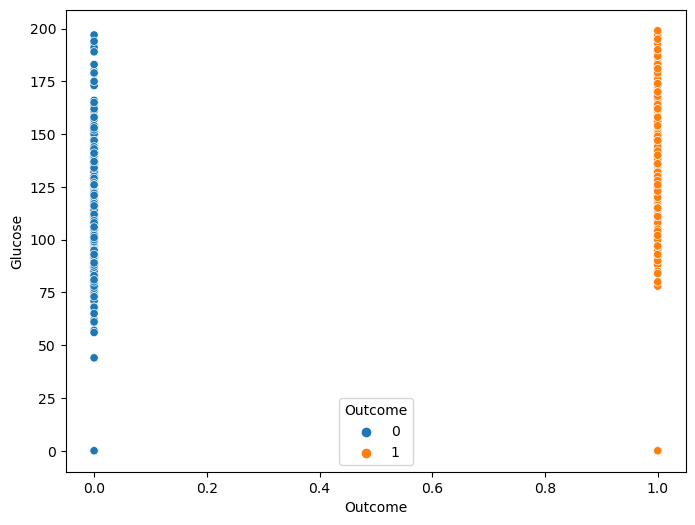

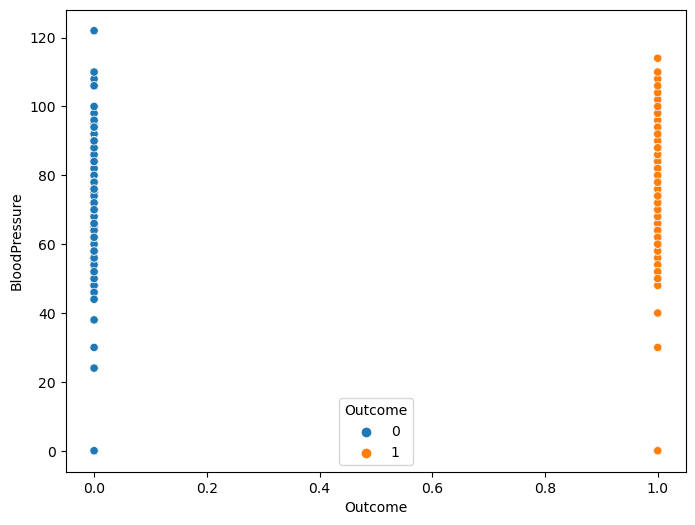

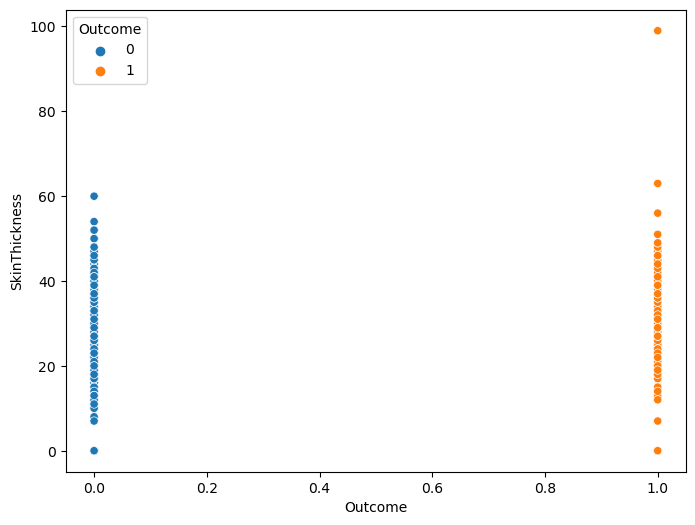

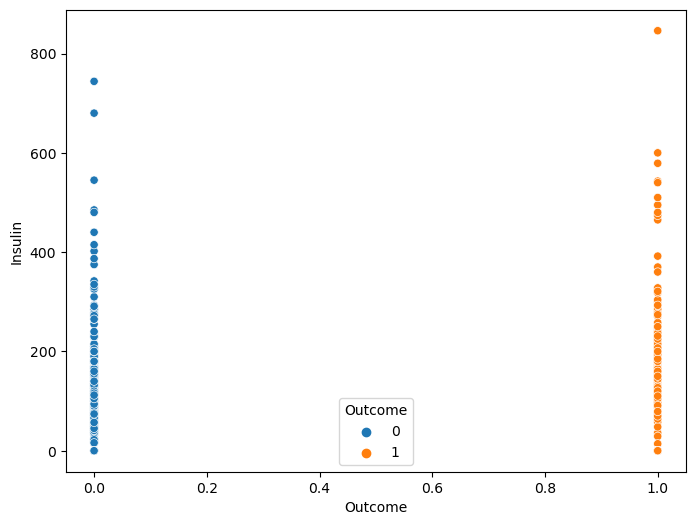

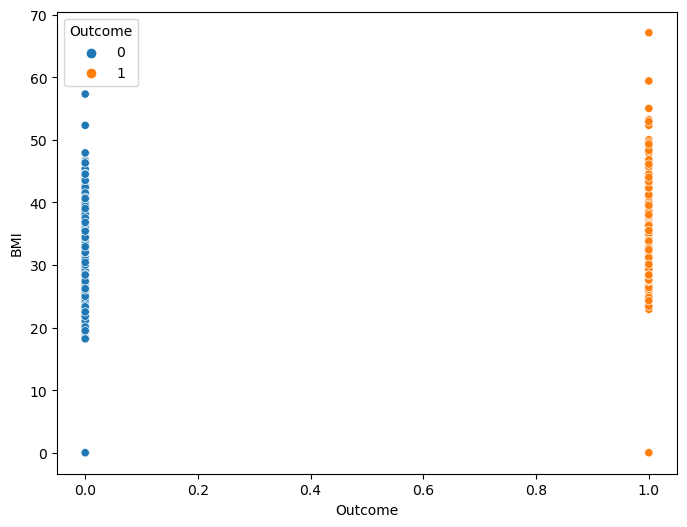

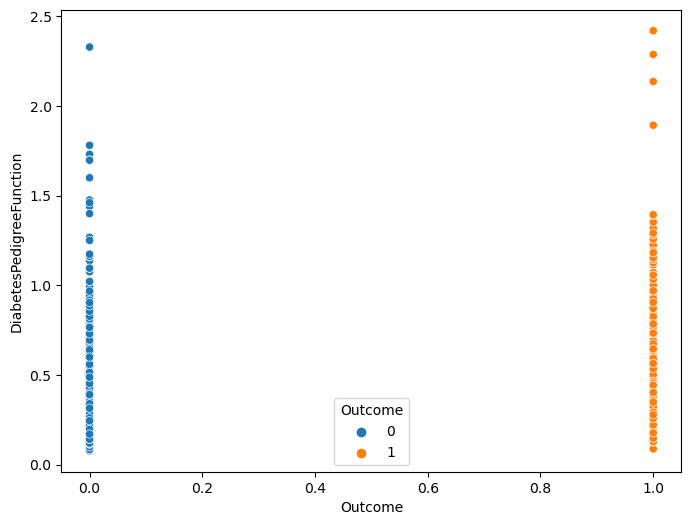

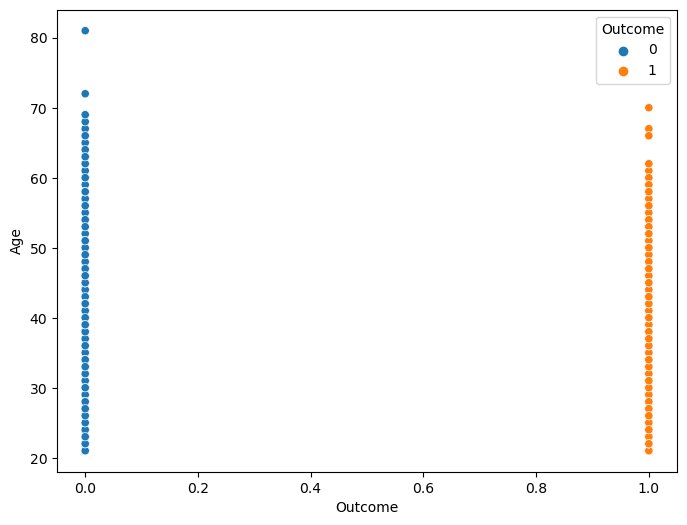

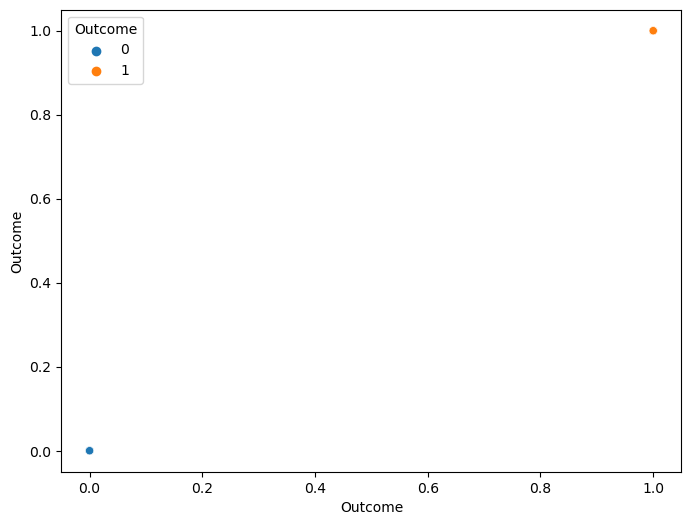

In [19]:
for i in diabetics:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=diabetics, y=i, x='Outcome',hue='Outcome')
   

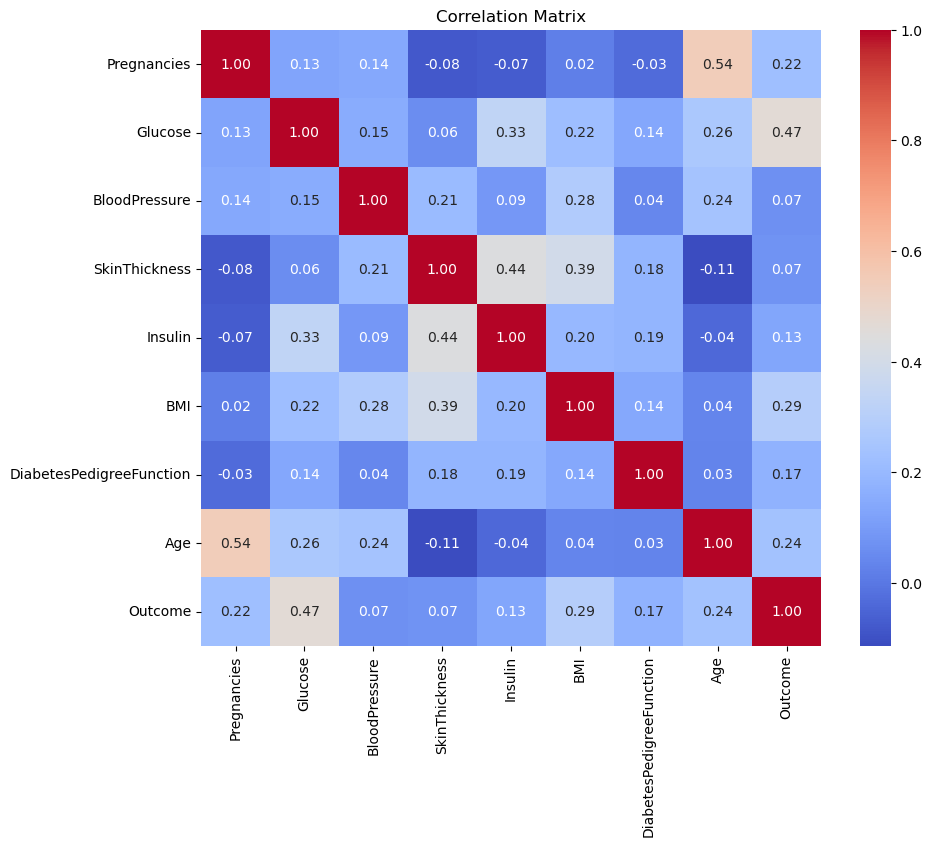

In [28]:
correlation_matrix =diabetics.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [29]:
#mostly the glucose level is much contributing to the outcome where other features like pregnancies,bmi,age is contributiong like around 22-30 5 other features like bloodpressure,insuline contributing 10% 


In [20]:
#since all are continuous variables so we have to standarixe

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)

In [24]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [25]:
X=standardized_data
Y=diabetics.Outcome

In [26]:
#Train test split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression

# LogisticRegression

In [35]:
logit=LogisticRegression()
lr=logit.fit(X_train,Y_train)
y_pred_train=logit.predict(X_train)
y_pred_test=logit.predict(X_test)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train))
print()
print(confusion_matrix(Y_test,y_pred_test))
print()

#classification report
print(classification_report(Y_train,y_pred_train))
print()
print(classification_report(Y_test,y_pred_test))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test))
print()


[[358  42]
 [ 90 124]]

[[89 11]
 [26 28]]

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       400
           1       0.75      0.58      0.65       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154


Train Accuracy: 0.7850162866449512

Test Accuracy: 0.7597402597402597



# Decision Tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='entropy')
dt=dtree.fit(X_train,Y_train)
y_pred_train_dt=dtree.predict(X_train)
y_pred_test_dt=dtree.predict(X_test)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train_dt))
print()
print(confusion_matrix(Y_test,y_pred_test_dt))
print()

#classification report
print(classification_report(Y_train,y_pred_train_dt))
print()
print(classification_report(Y_test,y_pred_test_dt))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train_dt))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test_dt))
print()


[[400   0]
 [  0 214]]

[[81 19]
 [25 29]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


              precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.60      0.54      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154


Train Accuracy: 1.0

Test Accuracy: 0.7142857142857143



# Random Forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

Rtree=RandomForestClassifier(criterion='entropy')
rt=Rtree.fit(X_train,Y_train)
y_pred_train_rt=Rtree.predict(X_train)
y_pred_test_rt=Rtree.predict(X_test)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train_rt))
print()
print(confusion_matrix(Y_test,y_pred_test_rt))
print()

#classification report
print(classification_report(Y_train,y_pred_train_rt))
print()
print(classification_report(Y_test,y_pred_test_rt))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train_rt))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test_rt))
print()


[[400   0]
 [  0 214]]

[[88 12]
 [27 27]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.69      0.50      0.58        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154


Train Accuracy: 1.0

Test Accuracy: 0.7467532467532467



# Support vector machine

In [38]:
from sklearn.svm import SVC
svc=SVC()
svcm=svc.fit(X_train,Y_train)
y_pred_train_svc=svc.predict(X_train)
y_pred_test_svc=svc.predict(X_test)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train_svc))
print()
print(confusion_matrix(Y_test,y_pred_test_svc))
print()

#classification report
print(classification_report(Y_train,y_pred_train_svc))
print()
print(classification_report(Y_test,y_pred_test_svc))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train_svc))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test_svc))
print()


[[373  27]
 [ 78 136]]

[[88 12]
 [30 24]]

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       400
           1       0.83      0.64      0.72       214

    accuracy                           0.83       614
   macro avg       0.83      0.78      0.80       614
weighted avg       0.83      0.83      0.82       614


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.67      0.44      0.53        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154


Train Accuracy: 0.8289902280130294

Test Accuracy: 0.7272727272727273



# Naive bayes

In [39]:
from sklearn.naive_bayes import BernoulliNB
bernb=BernoulliNB()
ber=bernb.fit(X_train,Y_train)
y_pred_train_br=bernb.predict(X_train)
y_pred_test_br=bernb.predict(X_test)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train_br))
print()
print(confusion_matrix(Y_test,y_pred_test_br))
print()

#classification report
print(classification_report(Y_train,y_pred_train_br))
print()
print(classification_report(Y_test,y_pred_test_br))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train_br))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test_br))
print()


[[316  84]
 [ 80 134]]

[[79 21]
 [28 26]]

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       400
           1       0.61      0.63      0.62       214

    accuracy                           0.73       614
   macro avg       0.71      0.71      0.71       614
weighted avg       0.73      0.73      0.73       614


              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154


Train Accuracy: 0.7328990228013029

Test Accuracy: 0.6818181818181818



# Cross Validation

In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(), X, Y, cv=cv)

array([0.82467532, 0.7987013 , 0.75974026, 0.80519481, 0.74025974])

In [42]:
#around 75 % the values are there macro avg     precission   0.75   recall   0.70    f-score  0.72  
#in both the training and testing where i colclude which is an good model for prediction

# Making a Predictive System

In [51]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


# saving the trained model

In [57]:
import pickle

In [48]:
filename='trained model.sav'
pickle.dump(lr,open(filename,'wb'))

In [49]:
#loading the saved model

In [50]:
loaded_model=pickle.load(open('trained model.sav','rb'))

In [52]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic
